<a href="https://colab.research.google.com/github/ProsperChuks/KNNeighbors-Regression-Model/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

### creating and training the model

In [29]:
X,y = load_boston(return_X_y=True)

# redefined model: pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])

comp_model = GridSearchCV(estimator=pipe, param_grid={
    'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}, cv=3)

comp_model.fit(X,y)
pd.DataFrame(comp_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001589,0.000311,0.002235,0.000104,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001350,0.000052,0.002563,0.000235,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001322,0.000063,0.002808,0.000144,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001390,0.000097,0.002318,0.000016,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001486,0.000101,0.002467,0.000167,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001490,0.000120,0.002537,0.000052,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001271,0.000063,0.002351,0.000051,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001200,0.000008,0.002295,0.000155,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001240,0.000028,0.002848,0.000130,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001536,0.000217,0.002494,0.000179,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


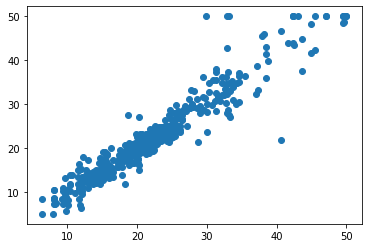

In [30]:
# predict
predict = com_model.predict(X)

plt.scatter(predict, y)